In [154]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) #dataset id
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 
  
# metadata 
print(aids_clinical_trials_group_study_175.metadata) 
  
# variable information 
print(aids_clinical_trials_group_study_175.variables) 

{'uci_id': 890, 'name': 'AIDS Clinical Trials Group Study 175', 'repository_url': 'https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175', 'data_url': 'https://archive.ics.uci.edu/static/public/890/data.csv', 'abstract': 'The AIDS Clinical Trials Group Study 175 Dataset contains healthcare statistics and categorical information about patients who have been diagnosed with AIDS. This dataset was initially published in 1996. The prediction task is to predict whether or not each patient died within a certain window of time or not. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 2139, 'num_features': 23, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Sexual Orientation', 'Race', 'Gender'], 'target_col': ['cid'], 'index_col': ['pidnum'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1996, 'last_updated': 'Fri Nov 

In [155]:
import pandas as pd
df = pd.concat([X, y], axis=1)
df

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,1091,3,21,53.2980,1,0,0,100,0,1,...,1,3,0,1,1,152,109,561,720,0
2135,395,0,17,102.9672,1,0,0,100,0,1,...,1,3,0,0,1,373,218,1759,1030,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,...,1,3,0,1,0,419,364,1391,1041,0
2137,465,0,14,60.0000,1,0,0,100,0,0,...,0,1,0,0,0,166,169,999,1838,1


Most of the features are Binary and categorical. Logistic Regression, Random Forests and Naive Bayes are better models.

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2139 non-null   int64  
 1   trt      2139 non-null   int64  
 2   age      2139 non-null   int64  
 3   wtkg     2139 non-null   float64
 4   hemo     2139 non-null   int64  
 5   homo     2139 non-null   int64  
 6   drugs    2139 non-null   int64  
 7   karnof   2139 non-null   int64  
 8   oprior   2139 non-null   int64  
 9   z30      2139 non-null   int64  
 10  zprior   2139 non-null   int64  
 11  preanti  2139 non-null   int64  
 12  race     2139 non-null   int64  
 13  gender   2139 non-null   int64  
 14  str2     2139 non-null   int64  
 15  strat    2139 non-null   int64  
 16  symptom  2139 non-null   int64  
 17  treat    2139 non-null   int64  
 18  offtrt   2139 non-null   int64  
 19  cd40     2139 non-null   int64  
 20  cd420    2139 non-null   int64  
 21  cd80     2139 

## Data preprocessing
Including modify categorical variable to dummy variable, drop unrelated feature, feature selection and feature scaling.

In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report

# encode categorical variables, drop unrelated or dublicated features etc.
df1 = pd.get_dummies(df, columns=['trt', 'strat']) 
df1 = df1.drop(['treat','str2'], axis=1)  # dropped duplicated columns
df1

#df1['age_wtkg_interaction'] = df1['age'] * df1['wtkg']
#df1['cd4_difference'] = df1['cd420']-df1['cd40']
#df1['cd8_difference'] = df1['cd820']-df1['cd80']
#df1['dfference'] = df1['zprior']*df1['trt1']  
# (z30 =1 and trt= 0) -> cid tend to be 1

,time,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,...,cd80,cd820,cid,trt_0,trt_1,trt_2,trt_3,strat_1,strat_2,strat_3
0,948,48,89.8128,0,0,0,100,0,0,1,...,566,324,0,False,False,True,False,True,False,False
1,1002,61,49.4424,0,0,0,90,0,1,1,...,392,564,1,False,False,False,True,False,False,True
2,961,45,88.4520,0,1,1,90,0,1,1,...,2063,1893,0,False,False,False,True,False,False,True
3,1166,47,85.2768,0,1,0,100,0,1,1,...,1590,966,0,False,False,False,True,False,False,True
4,1090,43,66.6792,0,1,0,100,0,1,1,...,870,782,0,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,1091,21,53.2980,1,0,0,100,0,1,1,...,561,720,0,False,False,False,True,False,False,True
2135,395,17,102.9672,1,0,0,100,0,1,1,...,1759,1030,0,True,False,False,False,False,False,True
2136,1104,53,69.8544,1,1,0,90,0,1,1,...,1391,1041,0,False,False,True,False,False,False,True
2137,465,14,60.0000,1,0,0,100,0,0,1,...,999,1838,1,True,False,False,False,True,False,False


In [158]:
# Convert specified features to boolean data type
features_to_convert = ['hemo', 'homo', 'drugs', 'oprior', 'z30', 'zprior','race','gender','symptom','offtrt']
df1[features_to_convert] = df1[features_to_convert].astype(bool)

In [159]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2139 non-null   int64  
 1   age      2139 non-null   int64  
 2   wtkg     2139 non-null   float64
 3   hemo     2139 non-null   bool   
 4   homo     2139 non-null   bool   
 5   drugs    2139 non-null   bool   
 6   karnof   2139 non-null   int64  
 7   oprior   2139 non-null   bool   
 8   z30      2139 non-null   bool   
 9   zprior   2139 non-null   bool   
 10  preanti  2139 non-null   int64  
 11  race     2139 non-null   bool   
 12  gender   2139 non-null   bool   
 13  symptom  2139 non-null   bool   
 14  offtrt   2139 non-null   bool   
 15  cd40     2139 non-null   int64  
 16  cd420    2139 non-null   int64  
 17  cd80     2139 non-null   int64  
 18  cd820    2139 non-null   int64  
 19  cid      2139 non-null   int64  
 20  trt_0    2139 non-null   bool   
 21  trt_1    2139 

In [160]:
X = df1.drop(['cid'], axis=1) 
y = df1['cid']  

# Perform feature selection

Since our predictive variable is bool data type, we will use chi-square test for feature selection.

In [161]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

chi2_selector = SelectKBest(score_func=chi2)
chi2_selector.fit(X, y)
# Get the chi-squared scores for all features
chi2_scores = chi2_selector.scores_

feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_scores})
feature_scores_df = feature_scores_df.sort_values(by='Chi2 Score', ascending=False)
print(feature_scores_df)

    Feature    Chi2 Score
0      time  68686.327203
10  preanti  20434.619213
16    cd420  14412.560687
15     cd40   2955.768751
17     cd80   2133.193099
18    cd820    171.985591
13  symptom     29.544678
19    trt_0     26.974589
1       age     22.790526
23  strat_1     19.077054
25  strat_3     17.860268
8       z30     15.148902
14   offtrt     11.750698
6    karnof      8.266038
20    trt_1      6.061356
11     race      4.768997
5     drugs      4.606804
21    trt_2      3.595626
7    oprior      3.559806
4      homo      2.135966
2      wtkg      1.314608
12   gender      0.749117
22    trt_3      0.722849
3      hemo      0.243703
24  strat_2      0.130154
9    zprior      0.000000


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


We will drop the unrrelated features.

In [162]:
X = df1.drop(['homo', 'wtkg', 'gender', 'trt_3', 'hemo', 'strat_2', 'zprior','cid'], axis=1) 

## Perform classification using logistic regression. To penalize less important features in logistic regression, we will use L1 (Lasso) regularization.

We will perform feature scaling for logistic regession. Although logistic regression and neural networks are theoretically not sensitive to feature scaling, feature scaling can help improve convergence speed and performance in practice.

In [163]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [165]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000) 
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8551401869158879
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       327
           1       0.77      0.54      0.64       101

    accuracy                           0.86       428
   macro avg       0.82      0.75      0.77       428
weighted avg       0.85      0.86      0.85       428



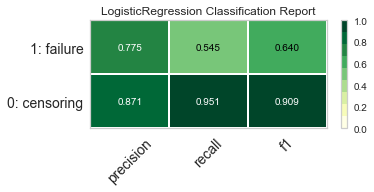

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       327
           1       0.77      0.54      0.64       101

    accuracy                           0.86       428
   macro avg       0.82      0.75      0.77       428
weighted avg       0.85      0.86      0.85       428



In [166]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(log_reg, classes=['0: censoring', '1: failure'],
                                  cmap="YlGn",size=(400, 200),fontsize=14, )
visualizer.fit(X_train_scaled, y_train)  # Fit the visualizer and the model
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()  # Finalize and show the figure

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Investigate the coefficient of the treatment.

    Feature  Coefficient  Absolute Coefficient
0      time    -1.789553              1.789553
9    offtrt    -0.834596              0.834596
11    cd420    -0.646595              0.646595
7      race    -0.310294              0.310294
13    cd820     0.292816              0.292816
5       z30     0.222264              0.222264
17  strat_1     0.215604              0.215604
3    karnof    -0.214086              0.214086
8   symptom     0.179658              0.179658
6   preanti     0.174238              0.174238
1       age     0.162267              0.162267
18  strat_3     0.136518              0.136518
2     drugs    -0.084313              0.084313
4    oprior     0.078772              0.078772
14    trt_0     0.078115              0.078115
12     cd80    -0.066160              0.066160
15    trt_1     0.048329              0.048329
16    trt_2     0.038870              0.038870
10     cd40     0.034135              0.034135


## RandomForestClassifier
Our purpose is to examine the performance of different types of AIDS treatments.

Perform classification using RandomForestClassifier.

In [168]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [150,200],   # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1]      # Minimum number of samples required to be at a leaf node
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Print the best cross-validation score found by grid search
print("Best Cross-Validation Score:", grid_search.best_score_)

# Get the best model
best_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_classifier.predict(X_test_scaled)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Check feature_importances to see which features are highly correlated with the target variable
# Determine which treatment is better based on the model's performance and feature importance



Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.8953881301894192
Accuracy: 0.8691588785046729
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       327
           1       0.80      0.59      0.68       101

    accuracy                           0.87       428
   macro avg       0.84      0.77      0.80       428
weighted avg       0.86      0.87      0.86       428



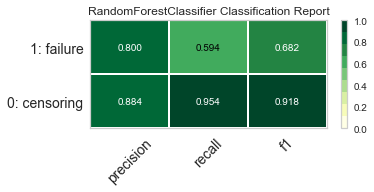

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       327
           1       0.80      0.59      0.68       101

    accuracy                           0.87       428
   macro avg       0.84      0.77      0.80       428
weighted avg       0.86      0.87      0.86       428



In [170]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(best_classifier, classes=['0: censoring', '1: failure'],
                                  cmap="YlGn",size=(400, 200),fontsize=14, )
visualizer.fit(X_train_scaled, y_train)  # Fit the visualizer and the model
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()  # Finalize and show the figure

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

The importances of the treatment options (trt_0, trt_1, trt_2, trt_3) are relatively low and close to each other. None of them stands out significantly as the most important feature. Therefore, based solely on feature importances, we can't conclusively determine which treatment is better.

In [171]:
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_classifier.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

Feature Importances:
    Feature  Importance
0      time    0.422835
11    cd420    0.142820
10     cd40    0.072323
1       age    0.054022
12     cd80    0.053328
13    cd820    0.052630
9    offtrt    0.051307
6   preanti    0.049131
3    karnof    0.014673
7      race    0.013454
8   symptom    0.013191
18  strat_3    0.011091
14    trt_0    0.010256
16    trt_2    0.008313
5       z30    0.008218
17  strat_1    0.006863
15    trt_1    0.006551
2     drugs    0.006072
4    oprior    0.002921


In [172]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   time     2139 non-null   int64
 1   age      2139 non-null   int64
 2   drugs    2139 non-null   bool 
 3   karnof   2139 non-null   int64
 4   oprior   2139 non-null   bool 
 5   z30      2139 non-null   bool 
 6   preanti  2139 non-null   int64
 7   race     2139 non-null   bool 
 8   symptom  2139 non-null   bool 
 9   offtrt   2139 non-null   bool 
 10  cd40     2139 non-null   int64
 11  cd420    2139 non-null   int64
 12  cd80     2139 non-null   int64
 13  cd820    2139 non-null   int64
 14  trt_0    2139 non-null   bool 
 15  trt_1    2139 non-null   bool 
 16  trt_2    2139 non-null   bool 
 17  strat_1  2139 non-null   bool 
 18  strat_3  2139 non-null   bool 
dtypes: bool(11), int64(8)
memory usage: 156.8 KB


## Subgroup Analysis

In [173]:
# Define age groups based on specified ranges
def get_age_group(age):
    if age <= 18:
        return '0-18'
    elif 19 <= age <= 30:
        return '19-30'
    elif 31 <= age <= 40:
        return '31-40'
    elif 41 <= age <= 50:
        return '41-50'
    else:
        return 'above 50'

# Apply age group function to create a new column 'age_group' and drop the age column
X['age_group'] = X['age'].apply(get_age_group)
X = X.drop(['age'], axis=1)   
X['age_group']

0          41-50
1       above 50
2          41-50
3          41-50
4          41-50
          ...   
2134       19-30
2135        0-18
2136    above 50
2137        0-18
2138       41-50
Name: age_group, Length: 2139, dtype: object

In [174]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   time       2139 non-null   int64 
 1   drugs      2139 non-null   bool  
 2   karnof     2139 non-null   int64 
 3   oprior     2139 non-null   bool  
 4   z30        2139 non-null   bool  
 5   preanti    2139 non-null   int64 
 6   race       2139 non-null   bool  
 7   symptom    2139 non-null   bool  
 8   offtrt     2139 non-null   bool  
 9   cd40       2139 non-null   int64 
 10  cd420      2139 non-null   int64 
 11  cd80       2139 non-null   int64 
 12  cd820      2139 non-null   int64 
 13  trt_0      2139 non-null   bool  
 14  trt_1      2139 non-null   bool  
 15  trt_2      2139 non-null   bool  
 16  strat_1    2139 non-null   bool  
 17  strat_3    2139 non-null   bool  
 18  age_group  2139 non-null   object
dtypes: bool(11), int64(7), object(1)
memory usage: 156.8+ KB


In [175]:
X['age_group'] = pd.Categorical(X['age_group'], categories=['0-18', '19-30', '31-40', '41-50', 'above_50'], ordered=True)
X = pd.get_dummies(X, columns=['age_group'])


In [176]:
X['cd4_difference'] = X['cd420']-X['cd40']

In [180]:
X

,time,drugs,karnof,oprior,z30,preanti,race,symptom,offtrt,cd40,...,trt_1,trt_2,strat_1,strat_3,age_group_0-18,age_group_19-30,age_group_31-40,age_group_41-50,age_group_above_50,cd4_difference
0,948,False,100,False,False,0,False,False,False,422,...,False,True,True,False,False,False,False,True,False,55
1,1002,False,90,False,True,895,False,False,False,162,...,False,False,False,True,False,False,False,False,False,56
2,961,True,90,False,True,707,False,False,True,326,...,False,False,False,True,False,False,False,True,False,-52
3,1166,False,100,False,True,1399,False,False,False,287,...,False,False,False,True,False,False,False,True,False,107
4,1090,False,100,False,True,1352,False,False,False,504,...,False,False,False,True,False,False,False,True,False,-151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,1091,False,100,False,True,842,False,False,True,152,...,False,False,False,True,False,True,False,False,False,-43
2135,395,False,100,False,True,417,True,False,True,373,...,False,False,False,True,True,False,False,False,False,-155
2136,1104,False,90,False,True,753,True,False,False,419,...,False,True,False,True,False,False,False,False,False,-55
2137,465,False,100,False,False,0,False,False,False,166,...,False,False,True,False,True,False,False,False,False,3


In [181]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

age_groups = ['age_group_0-18', 'age_group_19-30', 'age_group_31-40', 'age_group_41-50', 'age_group_above_50']

# Train and evaluate Random Forest for each age group
for age_group in age_groups:
    # Filter data for the current age group
    subset_X = X[X[age_group] == 1]  
    subset_y = y[X[age_group] == 1]
    
    X_train, X_test, y_train, y_test = train_test_split(subset_X, subset_y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Age Group: {age_group}")
    print(f"Accuracy: {accuracy}")

    # Print feature importance scores in descending order
    print(f"Feature Importance (Descending Order):")
    feature_importance = clf.feature_importances_
    feature_importance_sorted = sorted(zip(X_train.columns, feature_importance), key=lambda x: x[1], reverse=True)
    for feature, importance in feature_importance_sorted:
        print(f"{feature}: {importance}")
    print("\n")

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Age Group: age_group_0-18
Accuracy: 0.7142857142857143
Feature Importance (Descending Order):
time: 0.2982079220912606
cd420: 0.15838561341621862
cd4_difference: 0.10635538081101782
cd40: 0.10371027707804532
cd80: 0.07863702248022193
cd820: 0.056386481082703915
preanti: 0.05025647529708552
offtrt: 0.03109546014168547
trt_0: 0.0193626387001649
strat_3: 0.018970991184266737
symptom: 0.017409732367162704
trt_2: 0.016143336939016744
trt_1: 0.01075490530787137
race: 0.00969540753297625
karnof: 0.00927689464674759
strat_1: 0.0076821528830348885
z30: 0.007669308040519677
drugs: 0.0
oprior: 0.0
age_group_0-18: 0.0
age_group_19-30: 0.0
age_group_31-40: 0.0
age_group_41-50: 0.0
age_group_above_50: 0.0




/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Age Group: age_group_19-30
Accuracy: 0.875
Feature Importance (Descending Order):
time: 0.2977136639779057
cd420: 0.11810974940715988
cd4_difference: 0.10225840542959233
cd40: 0.08786906963715826
cd80: 0.08402265088945571
cd820: 0.08063390996831307
preanti: 0.047183286561714596
offtrt: 0.04601396100794757
symptom: 0.030407358457931414
karnof: 0.018576439399764555
race: 0.013381898047297123
trt_2: 0.012535866963110327
trt_0: 0.011706657484270164
strat_3: 0.011049978948189394
trt_1: 0.010865226396002105
z30: 0.010227030126366577
strat_1: 0.00881281672013942
drugs: 0.007589307837858493
oprior: 0.0010427227398234664
age_group_0-18: 0.0
age_group_19-30: 0.0
age_group_31-40: 0.0
age_group_41-50: 0.0
age_group_above_50: 0.0




/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Age Group: age_group_31-40
Accuracy: 0.8802083333333334
Feature Importance (Descending Order):
time: 0.363972073875719
cd420: 0.10442425974907109
cd40: 0.09094953889026708
cd4_difference: 0.08199961155665418
cd820: 0.07119012170464183
cd80: 0.07092223425232029
preanti: 0.0525967981934744
offtrt: 0.040098275980675925
race: 0.018661983416922306
karnof: 0.01812344171761834
strat_1: 0.01233299123355216
z30: 0.01164187391366196
trt_0: 0.011072646685560107
symptom: 0.010894033421908799
strat_3: 0.010188797356596304
trt_2: 0.009232123609422185
trt_1: 0.008600458002677941
drugs: 0.008374829459100695
oprior: 0.004723906980155516
age_group_0-18: 0.0
age_group_19-30: 0.0
age_group_31-40: 0.0
age_group_41-50: 0.0
age_group_above_50: 0.0




/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Age Group: age_group_41-50
Accuracy: 0.8902439024390244
Feature Importance (Descending Order):
time: 0.40754866324093975
cd420: 0.13558672426743965
cd4_difference: 0.086516067092547
cd40: 0.07559929397771331
preanti: 0.057759238365054276
cd820: 0.05577743974415953
cd80: 0.04839477121525057
offtrt: 0.0241940387887848
karnof: 0.01778184087672125
symptom: 0.014620641743855703
trt_0: 0.013962135573464493
z30: 0.012085514876685282
strat_1: 0.00999218828219077
drugs: 0.008648685299284047
race: 0.00824057101045329
trt_1: 0.007733862529639019
trt_2: 0.0076537759470215105
strat_3: 0.007166347447108774
oprior: 0.0007381997216869422
age_group_0-18: 0.0
age_group_19-30: 0.0
age_group_31-40: 0.0
age_group_41-50: 0.0
age_group_above_50: 0.0




ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

We got error for  age_group_above_50, since we dont have enough data that age are above 50.